In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Read the dataset to the python environment.

In [2]:
dt = pd.read_excel(r"D:\Data Science\python\Assignment Activity\Dataset\iris_07.xls")
dt.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dt.shape

(150, 5)

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2. Do necessary pre-processing steps.

In [5]:
dt.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

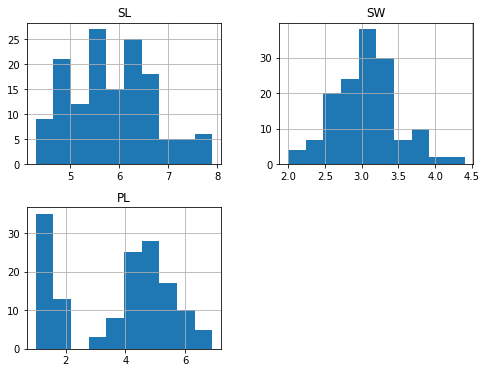

In [6]:
data = dt [['SL','SW','PL']]
data.hist(figsize=(8,6))
plt.show()

In [7]:
for i in ['SL','SW','PL']:
    dt[i]=dt[i].fillna(dt[i].mean())
dt

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


In [8]:
dt.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt['Classification']= le.fit_transform(dt["Classification"])

In [10]:
dt.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [11]:
feature_cols = list(dt.columns[:-1])
target_col = dt.columns[-1] 
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

Feature columns:
['SL', 'SW', 'PL', 'PW']

Target column: Classification


In [12]:
#Splitting data
X = dt.drop(['Classification'],axis = 1)
Y = dt['Classification']

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=2,test_size = 0.3)

In [14]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
Logit_model = LogisticRegression()
Logit_model.fit(X_train,Y_train)
y_pred = Logit_model.predict(X_test)

C:\Users\jeffi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [16]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average = 'weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average = 'weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average = 'weighted'))

Accuracy is : 0.9555555555555556
Precision is : 0.9571428571428571
Recall is : 0.9555555555555556
F1 is : 0.9556303778526001


In [17]:
confusion_matrix(Y_test,y_pred)

array([[16,  1,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]], dtype=int64)

In [39]:
#KNN Classification
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski')
    classifier.fit(X_train,Y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(Y_test,y_pred)
    acc_values.append(acc)

In [19]:
acc_values

[0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556]

Text(0, 0.5, 'accuracy')

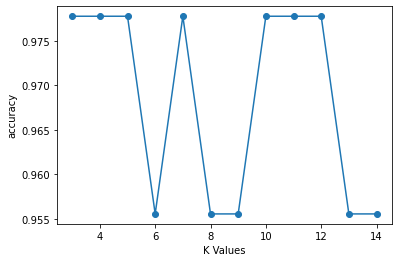

In [20]:
plt.plot(neighbors, acc_values,'o-')
plt.xlabel('K Values')
plt.ylabel('accuracy')

In [64]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)

In [65]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9555555555555556
Precision is : 0.9614814814814815
Recall is : 0.9555555555555556
F1 is : 0.9555555555555556


In [57]:
confusion_matrix(Y_test,y_pred)

array([[17,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 13]], dtype=int64)

In [24]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
Logit_model = LogisticRegression()
Logit_model.fit(X_train,Y_train)
y_pred = Logit_model.predict(X_test)

In [26]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9777777777777777
Precision is : 0.9793650793650793
Recall is : 0.9777777777777777
F1 is : 0.9778061586490706


In [27]:
confusion_matrix(Y_test,y_pred)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]], dtype=int64)

In [28]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [29]:
y_pred = dt_model.predict(X_test)

In [42]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9333333333333333
Precision is : 0.9458333333333333
Recall is : 0.9333333333333333
F1 is : 0.9330779054916987


In [31]:
Y_test.value_counts()

0    17
1    15
2    13
Name: Classification, dtype: int64

In [32]:
confusion_matrix(Y_test,y_pred)

array([[17,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 13]], dtype=int64)

In [36]:
#SVM
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train,Y_train)

SVC(kernel='linear')

In [40]:
y_pred = svm_linear.predict(X_test)

In [43]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9333333333333333
Precision is : 0.9458333333333333
Recall is : 0.9333333333333333
F1 is : 0.9330779054916987


In [66]:
confusion_matrix(Y_test,y_pred)

array([[17,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 13]], dtype=int64)

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(X_train,Y_train)

SVC(kernel='linear')

In [53]:
y_pred = svm_linear.predict(X_test)

In [54]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9333333333333333
Precision is : 0.9458333333333333
Recall is : 0.9333333333333333
F1 is : 0.9330779054916987


In [67]:
confusion_matrix(Y_test,y_pred)

array([[17,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 13]], dtype=int64)

In [58]:
#Polynomial SVM
svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(X_train,Y_train)
y_pred = svm_poly.predict(X_test)

In [59]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9777777777777777
Precision is : 0.9791666666666666
Recall is : 0.9777777777777777
F1 is : 0.9776917562724015


In [68]:
confusion_matrix(Y_test,y_pred)

array([[17,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 13]], dtype=int64)

In [60]:
#Radial SVM
svm_radial = SVC(kernel ='rbf')
svm_radial.fit(X_train,Y_train)
y_pred = svm_radial.predict(X_test)

In [61]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9555555555555556
Precision is : 0.9571428571428571
Recall is : 0.9555555555555556
F1 is : 0.9556303778526001


In [69]:
confusion_matrix(Y_test,y_pred)

array([[17,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 13]], dtype=int64)

In [72]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)

In [73]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9777777777777777
Precision is : 0.9793650793650793
Recall is : 0.9777777777777777
F1 is : 0.9778061586490706


In [74]:
confusion_matrix(Y_test,y_pred)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]], dtype=int64)